# Clustering

In [226]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import umap.umap_ as umap
from sklearn.tree import DecisionTreeClassifier

# Load Preprocessed Data from previous notebook

In [227]:
df = pd.read_csv('./preprocessed_numeric.csv')
df_cat = pd.read_csv('./preprocessed_categorical.csv')

# Feature Scaling

In [228]:
def clusterize(model):
    clusters = model.fit_predict(scaled_df)

    unscaled_numeric_features = pd.DataFrame(scaler.inverse_transform(scaled_df))
    unscaled_numeric_features.columns = df.columns
    df_clusters = pd.concat([unscaled_numeric_features, pd.Series(clusters, name='labels', index=unscaled_numeric_features.index)], axis=1)
    
    s_score = silhouette_score(scaled_df, model.labels_)
    print(f"Silhouette Score: {s_score:.3f}")
    
    return df_clusters

In [229]:
# two_dim = TSNE(random_state=42).fit_transform(df)

In [230]:
def plot_clusters_tsne(dataframe):
    # t-SNE visualization
    pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=dataframe['labels'], colormap='tab10', figsize=(10,10))
    plt.show()

In [231]:
def plot_clusters_umap(dataframe):
    umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(df)
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c=dataframe['labels'], cmap='viridis')
    plt.title('UMAP Visualization of Clusters')
    plt.show()

In [232]:
def assess_feature_importance(dataframe):
    # Preparing the data
    X = dataframe.drop('labels', axis=1)
    y = dataframe['labels']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fitting the decision tree
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))
    return pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [233]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

## K-Means

<Axes: >

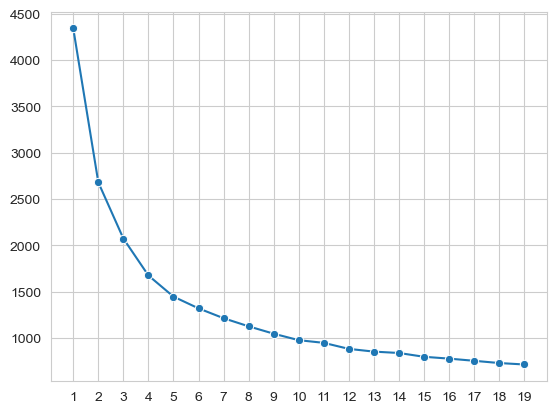

In [234]:
clusters_range = range(1, 20)
inertia = []
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    
plot = sns.lineplot(x=clusters_range, y=inertia, marker='o')
plot.set_xticks(clusters_range)
plot

In [239]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans_4_clustered_df = clusterize(kmeans)
# plot_clusters_tsne(kmeans_4_clustered_df)
kmeans_4_clustered_df.groupby('labels').mean().T
# assess_feature_importance(kmeans_4_clustered_df)
# kmeans_4_clustered_df.groupby('labels').size()

Silhouette Score: 0.404


labels,0,1,2,3,4
Income,2434.599491,1583.320210,2457.069825,1207.706113,2818.805591
EnrollmentDurationInDays,238.087413,413.005906,176.673139,210.077398,903.604828
LastPeriodDurationInDays,365.497139,368.309055,181.420556,182.126192,237.473316
DaysWithoutFrequency,68.300699,111.556430,74.071963,64.974762,151.454257
LifetimeValue,183.931621,398.194934,160.807389,583.188822,647.383037
NumberOfFrequencies,30.297521,31.593176,27.280549,45.445878,116.957433
AttendedClasses,1.022250,26.682415,0.794086,39.563096,10.083863
AllowedWeeklyVisitsBySLA,6.985378,2.198163,6.989312,2.347168,6.863405
AllowedNumberOfVisitsBySLA,59.925102,20.392349,44.754316,18.079849,50.631773
RealNumberOfVisits,5.570884,3.076115,5.720164,4.057207,6.864676


<Axes: xlabel='labels'>

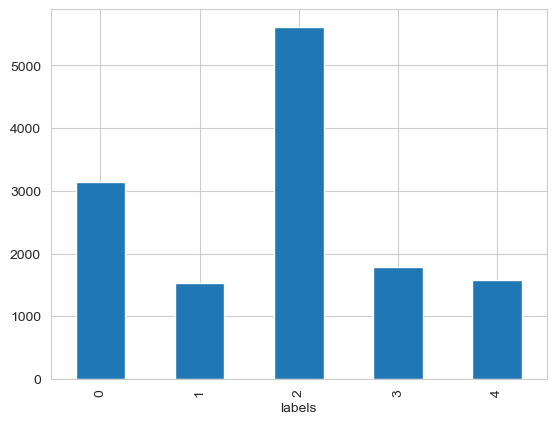

In [240]:
# bar plot size of clusters
kmeans_4_clustered_df.groupby('labels').size().plot(kind='bar')

/Users/carlos.costa/anaconda3/envs/DM2324/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


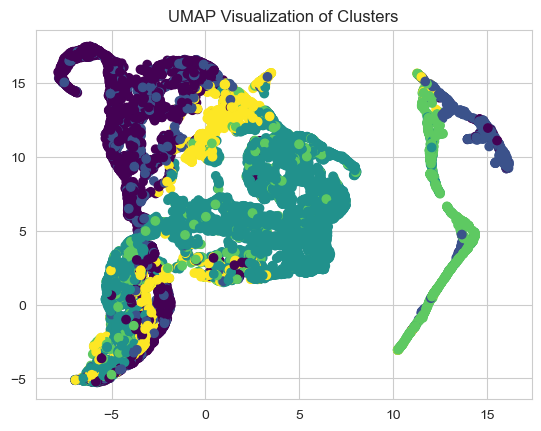

In [241]:
plot_clusters_umap(kmeans_4_clustered_df)

In [242]:
cat_df_clusters = pd.concat([df_cat, kmeans_4_clustered_df['labels']], axis=1)
cat_df_clusters.groupby('labels').sum()

,Gender_Male,Gender_Female,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities,Dropout
labels,,,,,,,,,,,,
0,1290,1856,151,25.0,577.0,2102.0,50.0,15.0,530.0,35.0,0.0,3027
1,588,936,12,4.0,928.0,149.0,233.0,210.0,42.0,54.0,13.0,1444
2,2120,3494,208,41.0,637.0,4507.0,61.0,6.0,641.0,136.0,2.0,4702
3,757,1026,11,12.0,1269.0,179.0,300.0,75.0,60.0,40.0,10.0,891
4,753,821,287,21.0,447.0,1127.0,88.0,16.0,230.0,105.0,0.0,1286


# Checking results (double check it with ChatGPT later)
## View results
- Check if the cluster center (mean) of any variables doesn't vary much between clusters, if so, we can drop it.
- If there are clusters with too few customers, we can check if the center of the variables is similar to the other clusters, if so, we can merge them.


## Visualization
- We can plot cluster centers:
```python
df.groupby('labels') \ [scaled_features].mean().plot(kind='bar')
```

# Feature reduction
- Factor Analysis
- Multidimensional scaling